In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pgeocode
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

SAMHSA Treatment Facilities by State [link](https://www.samhsa.gov/data/report/national-directory-of-drug-and-alcohol-abuse-treatment-facilities)

In [3]:
samhsa_data = pd.read_excel("static/Data/Excel:CSV/National_Directory_SA_Facilities_2022.xlsx")

samhsa_data.head()

,name1,name2,street1,street2,city,state,zip,phone,intake1,intake2,intake1a,intake2a,service_code_info
0,Shelby County Treatment Center,NaN,750 Highway 31 South,NaN,Alabaster,AL,35007,205-216-0200,NaN,NaN,NaN,NaN,SA DT SUMH * OP OD OIT OMB ORT * MU BU NU * PM...
1,Lighthouse of Tallapoosa County Inc,Substance Abuse Rehab Program/Resid,36 Franklin Street,NaN,Alexander City,AL,35010,256-234-4894,NaN,NaN,NaN,NaN,SA HH SUMH * RES RL * BU * RPE PC * ACMA * AUR...
2,South Central Alabama MHC,Covington Cnty/Adult SA OP,205 Academy Drive,NaN,Andalusia,AL,36420,334-428-5050,334-428-5040,NaN,NaN,NaN,SA * OP ORT * PC * ACMA * AUPC * MOA * BIA CBT...
3,South Central Alabama MHC,First Step,205 Academy Drive,NaN,Andalusia,AL,36420,334-428-5002,NaN,334-428-5050,NaN,NaN,SA * RES RS * ACMA * AUPC * NOOP * CBT RELP SA...
4,Anniston Fellowship House Inc,NaN,106 East 22nd Street,NaN,Anniston,AL,36201,256-236-7229,NaN,NaN,NaN,NaN,SA HH * RES RL * RPE PC * ACMA * AURPE * MOA *...


In [4]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

inv_state_abbrev = {v: k for k, v in us_state_to_abbrev.items()}
#copied from https://gist.github.com/rogerallen/1583593
#source https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping

In [5]:
geo = pgeocode.Nominatim("US")

samhsa_data["Longitude"]=None
samhsa_data["Latitude"]=None

for index, row in samhsa_data.iterrows():
    zipcode = row['zip']
    state_abbreviation = row['state']
    state_name = inv_state_abbrev.get(state_abbreviation, None)
    location = geo.query_postal_code(zipcode)
    if not location.empty:
        samhsa_data.at[index, 'Longitude'] = location.longitude
        samhsa_data.at[index, 'Latitude'] = location.latitude
    samhsa_data.at[index, 'state_name'] = state_name

samhsa_data.head()

,name1,name2,street1,street2,city,state,zip,phone,intake1,intake2,intake1a,intake2a,service_code_info,Longitude,Latitude,state_name
0,Shelby County Treatment Center,NaN,750 Highway 31 South,NaN,Alabaster,AL,35007,205-216-0200,NaN,NaN,NaN,NaN,SA DT SUMH * OP OD OIT OMB ORT * MU BU NU * PM...,-86.7944,33.1934,Alabama
1,Lighthouse of Tallapoosa County Inc,Substance Abuse Rehab Program/Resid,36 Franklin Street,NaN,Alexander City,AL,35010,256-234-4894,NaN,NaN,NaN,NaN,SA HH SUMH * RES RL * BU * RPE PC * ACMA * AUR...,-85.9368,32.9164,Alabama
2,South Central Alabama MHC,Covington Cnty/Adult SA OP,205 Academy Drive,NaN,Andalusia,AL,36420,334-428-5050,334-428-5040,NaN,NaN,NaN,SA * OP ORT * PC * ACMA * AUPC * MOA * BIA CBT...,-86.4905,31.2971,Alabama
3,South Central Alabama MHC,First Step,205 Academy Drive,NaN,Andalusia,AL,36420,334-428-5002,NaN,334-428-5050,NaN,NaN,SA * RES RS * ACMA * AUPC * NOOP * CBT RELP SA...,-86.4905,31.2971,Alabama
4,Anniston Fellowship House Inc,NaN,106 East 22nd Street,NaN,Anniston,AL,36201,256-236-7229,NaN,NaN,NaN,NaN,SA HH * RES RL * RPE PC * ACMA * AURPE * MOA *...,-85.8382,33.6539,Alabama


In [6]:
samhsa_data_final=samhsa_data[["name1","name2","street1","city","state_name","zip","Longitude","Latitude","phone"]]


In [7]:
samhsa_data_final_nonan= samhsa_data_final.replace(np.nan,'',regex=True)
samhsa_data_final_nonan.head()

,name1,name2,street1,city,state_name,zip,Longitude,Latitude,phone
0,Shelby County Treatment Center,,750 Highway 31 South,Alabaster,Alabama,35007,-86.7944,33.1934,205-216-0200
1,Lighthouse of Tallapoosa County Inc,Substance Abuse Rehab Program/Resid,36 Franklin Street,Alexander City,Alabama,35010,-85.9368,32.9164,256-234-4894
2,South Central Alabama MHC,Covington Cnty/Adult SA OP,205 Academy Drive,Andalusia,Alabama,36420,-86.4905,31.2971,334-428-5050
3,South Central Alabama MHC,First Step,205 Academy Drive,Andalusia,Alabama,36420,-86.4905,31.2971,334-428-5002
4,Anniston Fellowship House Inc,,106 East 22nd Street,Anniston,Alabama,36201,-85.8382,33.6539,256-236-7229


In [8]:
# Getting states with the most facilities
facilities_per_state = samhsa_data_final_nonan.groupby(["state_name"]).count()["name1"]
facilities_per_state.sort_values(ascending= False).head(10)

state_name
California        1194
New York           710
Illinois           595
Florida            502
Pennsylvania       482
North Carolina     454
Ohio               439
Texas              402
Massachusetts      371
Washington         362
Name: name1, dtype: int64

In [9]:
population_report = pd.read_excel("static/Data/Excel:CSV/PopulationReport.xlsx")

population_report.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name,Pop. 1990,Pop. 2000,Pop. 2010,Pop. 2020,Pop. 2022,Change 2020-22
3,United States,248790925,281424600,308745538,331449520,333287557,0.005545
4,Alabama,4040389,4447207,4779736,5024356,5074296,0.00994
5,Alaska,550043,626933,710231,733378,733583,0.00028
6,Arizona,3665339,5130247,6392017,7151507,7359197,0.029041
7,Arkansas,2350624,2673293,2915918,3011555,3045637,0.011317
8,California,29811427,33871653,37253956,39538245,39029342,-0.012871
9,Colorado,3294473,4302086,5029196,5773733,5839926,0.011465


In [10]:
# Getting State and 2022 population columns
population_data = population_report[["Unnamed: 0","Unnamed: 5"]]
population_data.head()

,Unnamed: 0,Unnamed: 5
0,NaN,NaN
1,NaN,NaN
2,Name,Pop. 2022
3,United States,333287557
4,Alabama,5074296


In [11]:
# Droping first 4 rows
state_population = population_data.iloc[4:]
state_population.head()

,Unnamed: 0,Unnamed: 5
4,Alabama,5074296
5,Alaska,733583
6,Arizona,7359197
7,Arkansas,3045637
8,California,39029342


In [12]:
# Renaming columns
state_population.rename(columns={"Unnamed: 0":"state_name", "Unnamed: 5":"population_2022"}, inplace = True)
state_population.head()

,state_name,population_2022
4,Alabama,5074296
5,Alaska,733583
6,Arizona,7359197
7,Arkansas,3045637
8,California,39029342


In [13]:
state_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 4 to 57
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state_name       53 non-null     object
 1   population_2022  52 non-null     object
dtypes: object(2)
memory usage: 996.0+ bytes


In [14]:
# Converting data types
state_population["population_2022"]=state_population["population_2022"].fillna(0).astype(int)

In [15]:
state_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 4 to 57
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state_name       53 non-null     object
 1   population_2022  54 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 996.0+ bytes


In [16]:
merged_facilities_df = facilities_per_state.to_frame().merge(state_population, on = "state_name")
merged_facilities_df.head()

,state_name,name1,population_2022
0,Alabama,111,5074296
1,Alaska,81,733583
2,Arizona,314,7359197
3,Arkansas,120,3045637
4,California,1194,39029342


In [17]:
merged_facilities_df.rename(columns={"name1":"facilities_no"}, inplace = True)
merged_facilities_df.head()

,state_name,facilities_no,population_2022
0,Alabama,111,5074296
1,Alaska,81,733583
2,Arizona,314,7359197
3,Arkansas,120,3045637
4,California,1194,39029342


In [18]:
merged_facilities_df["facilities_per_capita"]=merged_facilities_df["facilities_no"]/merged_facilities_df["population_2022"]
merged_facilities_df.head()

,state_name,facilities_no,population_2022,facilities_per_capita
0,Alabama,111,5074296,0.000022
1,Alaska,81,733583,0.000110
2,Arizona,314,7359197,0.000043
3,Arkansas,120,3045637,0.000039
4,California,1194,39029342,0.000031


In [19]:
facilities_per_capita = merged_facilities_df[["state_name","facilities_per_capita"]]
facilities_per_capita.head()

,state_name,facilities_per_capita
0,Alabama,0.000022
1,Alaska,0.000110
2,Arizona,0.000043
3,Arkansas,0.000039
4,California,0.000031


In [20]:
# Using a bar chart to show the states with the most facilities
facilities_per_capita =facilities_per_capita.sort_values(by="facilities_per_capita",ascending= False).head(10)

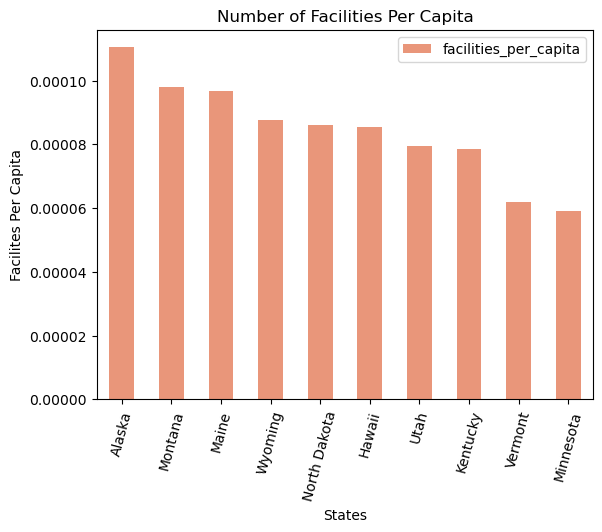

In [24]:
facilities_per_capita.plot.bar(x="state_name",y="facilities_per_capita", color= "darksalmon" , rot = 75)
plt.title("Number of Facilities Per Capita")
plt.ylabel("Facilites Per Capita")
plt.xlabel ("States")
plt.show()

In [22]:
state_facilities = []

for state, group in samhsa_data_final_nonan.groupby("state_name"):
    facilities = []
    
    for index, row in group.iterrows():
        facility = {
            "name1": row["name1"],
            "name2": row["name2"],
            "street1": row["street1"],
            "city": row["city"],
            "zip": row["zip"],
            "Longitude": row["Longitude"],
            "Latitude": row["Latitude"],
            "phone": row["phone"]
        }
        facilities.append(facility)
        facilities_no=[]
    state_dict = {
        "state_name": state,
        "facilities": facilities
    }
    state_facilities.append(state_dict)

result_json = json.dumps(state_facilities, separators=(',', ':'))
pprint(result_json)

('[{"state_name":"","facilities":[{"name1":"Yap Memorial '
 'Hospital","name2":"Department of Health Services","street1":"1 Keng Street '
 'Weloy","city":"Yap","zip":96943,"Longitude":"","Latitude":"","phone":"691-350-2115 '
 'x123"},{"name1":"Ministry of Health","name2":"Division of Behavioral '
 'Health","street1":"1 Hospital '
 'Road","city":"Palau","zip":96940,"Longitude":"","Latitude":"","phone":"680-488-4573"}]},{"state_name":"Alabama","facilities":[{"name1":"Shelby '
 'County Treatment Center","name2":"","street1":"750 Highway 31 '
 'South","city":"Alabaster","zip":35007,"Longitude":-86.7944,"Latitude":33.1934,"phone":"205-216-0200"},{"name1":"Lighthouse '
 'of Tallapoosa County Inc","name2":"Substance Abuse Rehab '
 'Program/Resid","street1":"36 Franklin Street","city":"Alexander '
 'City","zip":35010,"Longitude":-85.9368,"Latitude":32.9164,"phone":"256-234-4894"},{"name1":"South '
 'Central Alabama MHC","name2":"Covington Cnty/Adult SA OP","street1":"205 '
 'Academy '
 'Drive"

In [72]:
with open('static/Data/JSON_Files/New_Rehab_Facilities_by_State.json', 'w') as json_file:
    json_file.write(result_json)